<a href="https://colab.research.google.com/github/Vedant-cloud-ctrl/Credit-Risk-Modelling/blob/main/credit_risk_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

100%|██████████| 368k/368k [00:00<00:00, 540kB/s]

Extracting files...


In [2]:
import os

print(os.listdir(path))

['credit_risk_dataset.csv']


In [3]:
import pandas as pd
import os

df = pd.read_csv(os.path.join(path, "credit_risk_dataset.csv"))
print(df.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


In [5]:
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [6]:
print(df.describe(include=["int64", "float64"]))

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

In [7]:
print(df.describe(include="object"))

       person_home_ownership loan_intent loan_grade cb_person_default_on_file
count                  32581       32581      32581                     32581
unique                     4           6          7                         2
top                     RENT   EDUCATION          A                         N
freq                   16446        6453      10777                     26836


In [8]:
# Any duplicates
print(df.duplicated().sum())

165


In [9]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [10]:
# person age
print(df["person_age"].unique())

[ 22  21  25  23  24  26 144 123  20  32  34  29  33  28  35  31  27  30
  36  40  50  45  37  39  44  43  41  46  38  47  42  48  49  58  65  51
  53  66  61  54  57  59  62  60  55  52  64  70  78  69  56  73  63  94
  80  84  76  67]


In [11]:
# person emp length
print(df["person_emp_length"].unique())

[123.   5.   1.   4.   8.   2.   6.   7.   0.   9.   3.  10.  nan  11.
  18.  12.  17.  14.  16.  13.  19.  15.  20.  22.  21.  24.  23.  26.
  25.  27.  28.  31.  41.  34.  29.  38.  30.]


In [12]:
df["person_emp_length"] = df["person_emp_length"].fillna(df["person_emp_length"].median())

print(df["person_emp_length"].describe())

count    32416.000000
mean         4.768880
std          4.090411
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64


In [13]:
# loan interest
print(df["loan_int_rate"].unique()[:50])

[16.02 11.14 12.87 15.23 14.27  7.14 12.42 11.11  8.9  14.74 10.37  8.63
  7.9  18.39 10.65 20.25 18.25 10.99  7.49 16.77 17.58  7.29 14.54 12.68
 17.74  9.32  9.99 12.84 11.12  6.62 14.17 13.85 13.49  7.51 16.89   nan
 17.99 12.69  7.88 19.41 10.38 15.33 16.45 18.62 15.96 11.48  5.99 11.58
 15.7  15.99]


In [14]:
df["loan_int_rate"] = df["loan_int_rate"].fillna(df["loan_int_rate"].median())

print(df["loan_int_rate"].isnull().sum())

0


In [15]:
cols = ["person_age", "person_income", "loan_int_rate"]

def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers, lower_bound, upper_bound

for col in cols:
  outliers, lower, upper = detect_outliers(df, col)
  print(f"IQR bounds: {lower} to {upper}")
  print(f"Number of outliers: {len(outliers)}")

IQR bounds: 12.5 to 40.5
Number of outliers: 1491
IQR bounds: -22472.0 to 140232.0
Number of outliers: 1478
IQR bounds: 1.5600000000000014 to 20.04
Number of outliers: 70


# Boxplot

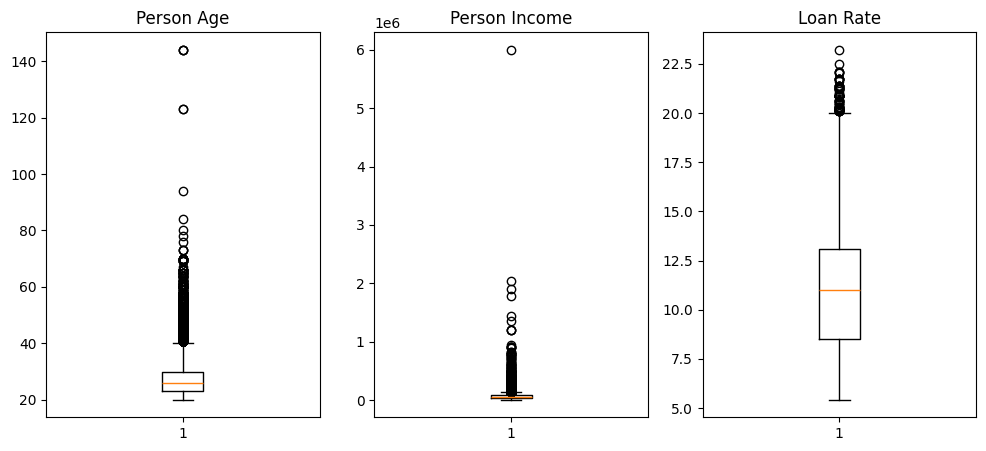

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 3, figsize=(12, 5))

ax[0].boxplot(df["person_age"])
ax[0].set_title("Person Age")

ax[1].boxplot(df["person_income"])
ax[1].set_title("Person Income")

ax[2].boxplot(df["loan_int_rate"])
ax[2].set_title("Loan Rate")

plt.show()

# Capping Outliers

In [17]:
import numpy as np

cols = ["person_age", "person_income", "person_emp_length"]

for col in cols:
    # 1. Calculate Percentile Limits (0.05 to 0.95)
    p_lower = df[col].quantile(0.05)
    p_upper = df[col].quantile(0.95)

    # 2. Calculate IQR Limits (1.5 * IQR)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_lower = Q1 - 1.5 * IQR
    iqr_upper = Q3 + 1.5 * IQR

    final_lower = max(p_lower, iqr_lower)
    final_upper = min(p_upper, iqr_upper)

    df[col] = np.clip(df[col], final_lower, final_upper)

In [18]:
print(df[["person_age", "person_income", "person_emp_length"]].max())

person_age               40.0
person_income        138000.0
person_emp_length        12.0
dtype: float64


In [19]:
print(df.describe())

         person_age  person_income  person_emp_length     loan_amnt  \
count  32416.000000   32416.000000       32416.000000  32416.000000   
mean      27.467269   62603.102110           4.583261   9593.845632   
std        5.173996   31157.939723           3.485628   6322.730241   
min       22.000000   22932.000000           0.000000    500.000000   
25%       23.000000   38542.000000           2.000000   5000.000000   
50%       26.000000   55000.000000           4.000000   8000.000000   
75%       30.000000   79218.000000           7.000000  12250.000000   
max       40.000000  138000.000000          12.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   32416.000000  32416.000000         32416.000000   
mean       11.014662      0.218688             0.170250   
std         3.083050      0.413363             0.106812   
min         5.420000      0.000000             0.000000   
25%         8.490000      0.000000             0.090000   
50%   

In [20]:
print(df["loan_status"].value_counts())

loan_status
0    25327
1     7089
Name: count, dtype: int64


In [21]:
print(df["loan_status"].value_counts(normalize=True)*100)

loan_status
0    78.13117
1    21.86883
Name: proportion, dtype: float64


In [22]:
print(df["cb_person_default_on_file"].value_counts())

cb_person_default_on_file
N    26686
Y     5730
Name: count, dtype: int64


In [23]:
print(df["cb_person_default_on_file"].value_counts(normalize=True)*100)

cb_person_default_on_file
N    82.323544
Y    17.676456
Name: proportion, dtype: float64


In [24]:
print(df["cb_person_cred_hist_length"].unique())

[ 3  2  4  8  7  6  9 10  5 11 16 15 12 13 17 14 25 28 27 22 19 29 23 26
 20 21 30 24 18]


In [25]:
# compare default history v. loan status
print(df.groupby("cb_person_default_on_file")["loan_status"].mean())
print("\n")

# See the average credit history length for those who defaulted vs those who didn't
print(df.groupby("loan_status")["cb_person_cred_hist_length"].mean())
print("\n")

cb_person_default_on_file
N    0.184329
Y    0.378709
Name: loan_status, dtype: float64


loan_status
0    5.846725
1    5.684723
Name: cb_person_cred_hist_length, dtype: float64




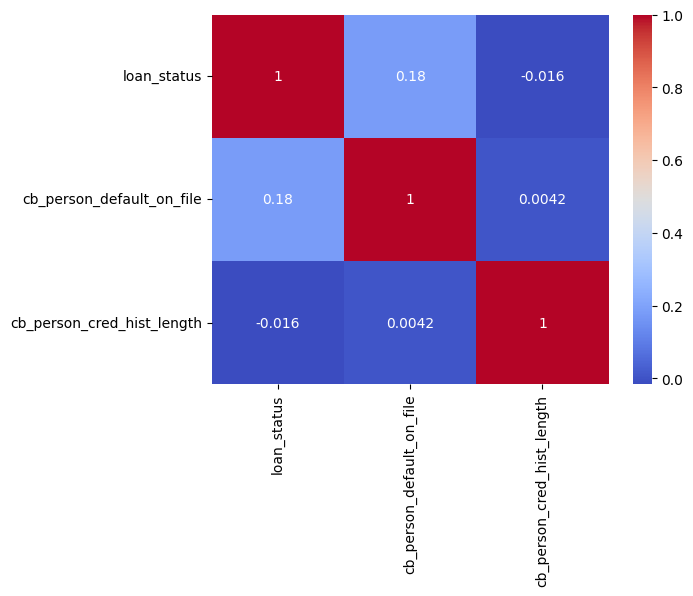

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

df["cb_person_default_on_file"] = df["cb_person_default_on_file"].map({"N":0, "Y":1})

sns.heatmap(df[["loan_status", "cb_person_default_on_file", "cb_person_cred_hist_length"]].corr(),
            annot=True, cmap="coolwarm")
plt.show();

In [27]:
# copy the df
data = df.copy()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  int64  
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.2+ MB
None


In [28]:
# feature engineering
data["loan_to_income"] = data["loan_amnt"] / (data["person_income"] + 1)
data["income_to_age"] = (data["loan_amnt"] * data["person_age"]) / (data["person_income"])
data["loan_to_age"] = data["loan_amnt"] / (data["person_age"] + 1)

In [29]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'loan_to_income', 'income_to_age', 'loan_to_age'],
      dtype='object')

In [37]:
# Split the train and test
from sklearn.model_selection import train_test_split

# define X & y
X = data.drop("loan_status", axis=1)
y = data["loan_status"]

# split the training and temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# split the temp into val and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Logistic Regression

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# define specific cols
ordinal_cols = ["loan_grade"]
grade_order = ["D", "B", "C", "A", "E", "F", "G"]

nominal_cols = ["person_home_ownership", "loan_intent"]

# numerical cols
numeric_cols = ["person_age", "person_income", "loan_amnt", "loan_int_rate", "loan_to_income", "income_to_age", "loan_to_age"]

# create a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("ordinal", OrdinalEncoder(categories=[grade_order]), ordinal_cols),
    ("onehot", OneHotEncoder(drop="first", sparse_output=False), nominal_cols),
    ("scale", StandardScaler(), numeric_cols)
], remainder="passthrough")

# logisitic regression model
lr_pipeline = ImbPipeline([
    ("prep", preprocessor),
    ("smote", SMOTE(sampling_strategy=0.6, random_state=42)),
    ("lr_classifier", LogisticRegression(max_iter=1000)),
])

# random forest model
rf_pipeline = ImbPipeline([
    ("prep", preprocessor),
    ("rf_classifier", RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        class_weight="balanced",
        random_state=42
    ))
])

# xgboost model
xgb_pipeline = ImbPipeline([
    ("prep", preprocessor),
    ("xgb_classifier", XGBClassifier(
        n_estimators=100,
        learning_rate=0.05,
        scale_pos_weight=0.4,
        max_depth=6,
        gamma=1
    ))
])

lr_model = lr_pipeline.fit(X_train, y_train)
rf_model = rf_pipeline.fit(X_train, y_train)
xgb_model = xgb_pipeline.fit(X_train, y_train)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

results = []

model_list = [
    ("Logistic Regression", lr_pipeline),
    ("Random Forest", rf_pipeline),
    ("XGBoost", xgb_pipeline)
]

for model_name, model in model_list:
  probs = model.predict_proba(X_val)[:, 1]

  results.append((model_name, probs))

for model_name, y_prob in results:
  custom_threshold={
      "Logistic Regression": 0.50,
      "Random Forest": 0.55,
      "XGBoost": 0.20
  }
  thresh = custom_threshold[model_name]
  y_pred = (y_prob >= thresh).astype(int)

  print(f"{model_name} (Threshold: {thresh})")
  print(classification_report(y_val, y_pred))
  print(f"Confusion Matrix:\n{confusion_matrix(y_val, y_pred)}\n")

Logistic Regression (Threshold: 0.5)
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2533
           1       0.60      0.69      0.64       709

    accuracy                           0.83      3242
   macro avg       0.76      0.78      0.77      3242
weighted avg       0.84      0.83      0.84      3242

Confusion Matrix:
[[2214  319]
 [ 223  486]]

Random Forest (Threshold: 0.55)
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2533
           1       0.86      0.71      0.78       709

    accuracy                           0.91      3242
   macro avg       0.89      0.84      0.86      3242
weighted avg       0.91      0.91      0.91      3242

Confusion Matrix:
[[2449   84]
 [ 206  503]]

XGBoost (Threshold: 0.2)
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2533
           1       0.91      0.72      0.80       7

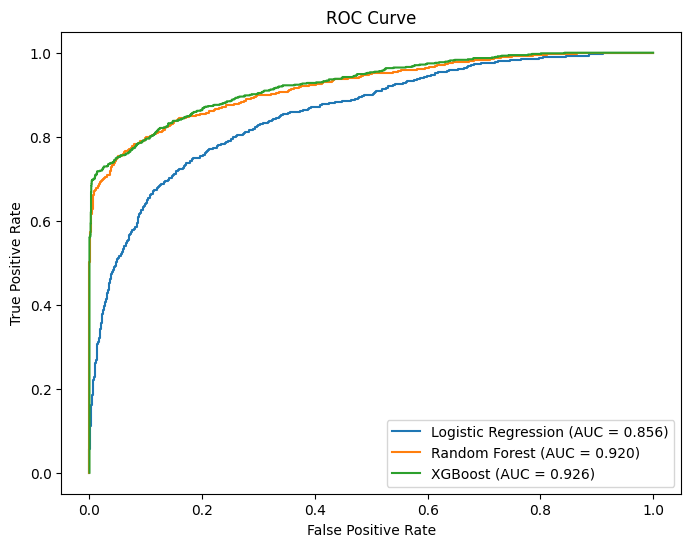

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))

for model_name, y_prob in results:
  fpr, tpr, threshold = roc_curve(y_val, y_prob)

  # cal
  auc_score = roc_auc_score(y_val, y_prob)

  # plot the line
  plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.3f})")

# plot
# plt.plot([0, 1], [1, 0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

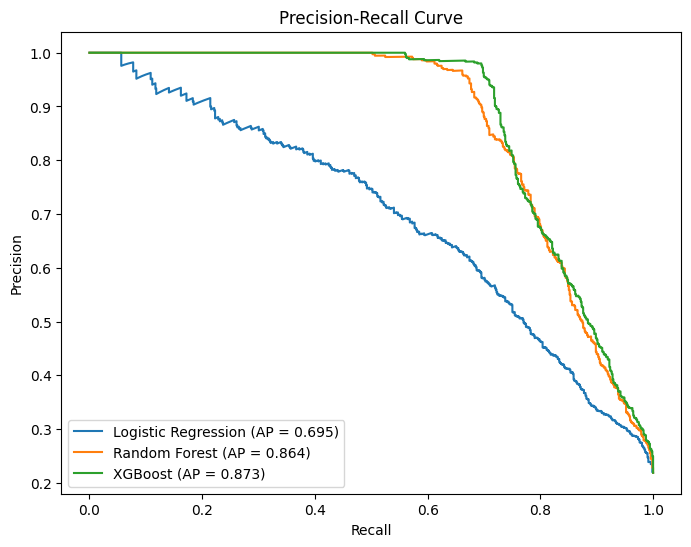

In [41]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8, 6))

for name, y_prob in results:
  precision, recall, _ = precision_recall_curve(y_val, y_prob)
  ap = average_precision_score(y_val, y_prob)

  plt.plot(recall, precision, label=f"{name} (AP = {ap:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

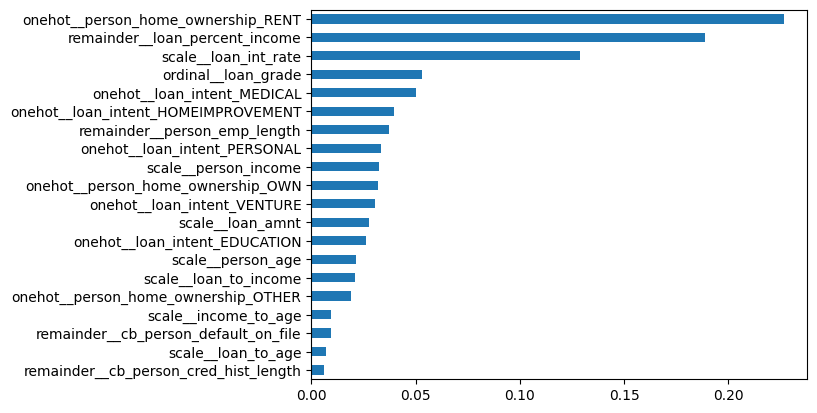

In [44]:
# get a classifier from your pipeline
xgb_model = xgb_pipeline.named_steps["xgb_classifier"]

# plot the top features
feat_importances = pd.Series(xgb_model.feature_importances_, index=preprocessor.get_feature_names_out())
feat_importances.sort_values(ascending=True).plot(kind="barh")
plt.show()